In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Generate a true sine wave
t = np.linspace(0, 10, 1000)
true_sine_wave = np.sin(t)

In [9]:
# Generate noisy observations
noise_std = 0.5
noisy_sine_wave = true_sine_wave + np.random.normal(0, noise_std, size=true_sine_wave.shape)

In [10]:
# Kalman Filter implementation
def kalman_filter(noisy_data, process_variance, measurement_variance):
    n = len(noisy_data)
    estimated_state = np.zeros(n)
    estimated_error = np.zeros(n)
    
    # Initial guesses
    estimated_state[0] = noisy_data[0]
    estimated_error[0] = 1.0
    
    for k in range(1, n):
        # Time update (predict)
        predicted_state = estimated_state[k-1]
        predicted_error = estimated_error[k-1] + process_variance
        
        # Measurement update (correct)
        kalman_gain = predicted_error / (predicted_error + measurement_variance)
        estimated_state[k] = predicted_state + kalman_gain * (noisy_data[k] - predicted_state)
        estimated_error[k] = (1 - kalman_gain) * predicted_error
    
    return estimated_state

In [11]:
# Apply the Kalman filter
process_variance = 1e-4
measurement_variance = noise_std**2
estimated_sine_wave = kalman_filter(noisy_sine_wave, process_variance, measurement_variance)

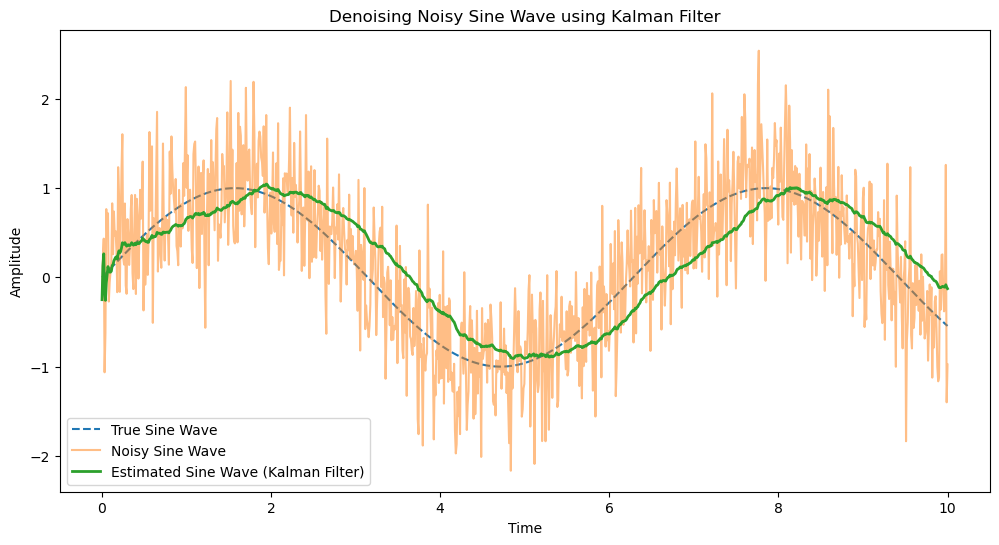

In [12]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, true_sine_wave, label='True Sine Wave', linestyle='--')
plt.plot(t, noisy_sine_wave, label='Noisy Sine Wave', alpha=0.5)
plt.plot(t, estimated_sine_wave, label='Estimated Sine Wave (Kalman Filter)', linewidth=2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Denoising Noisy Sine Wave using Kalman Filter')
plt.show()